<a href="https://colab.research.google.com/github/LishaRudani/Worldwide_Road_Accidents_EDA/blob/main/Worldwide_Road_Accident_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip

unzip:  cannot find or open /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip, /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.zip or /content/drive/MyDrive/Teach_Foundation_of_ML/project/Regression/archive.zip.ZIP.


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/RoadAccident_dataset/road_accident.csv')

In [ ]:
data

,Index,Country,Code,Year,Deaths,Sidedness
0,0,Afghanistan,AFG,1990,4154,0
1,1,Afghanistan,AFG,1991,4472,0
2,2,Afghanistan,AFG,1992,5106,0
3,3,Afghanistan,AFG,1993,5681,0
4,4,Afghanistan,AFG,1994,6001,0
...,...,...,...,...,...,...
8005,8005,Zimbabwe,ZWE,2015,2373,1
8006,8006,Zimbabwe,ZWE,2016,2436,1
8007,8007,Zimbabwe,ZWE,2017,2473,1
8008,8008,Zimbabwe,ZWE,2018,2509,1


In [ ]:
data.head()

,Index,Country,Code,Year,Deaths,Sidedness
0,0,Afghanistan,AFG,1990,4154,0
1,1,Afghanistan,AFG,1991,4472,0
2,2,Afghanistan,AFG,1992,5106,0
3,3,Afghanistan,AFG,1993,5681,0
4,4,Afghanistan,AFG,1994,6001,0


In [ ]:
data.tail()

,Index,Country,Code,Year,Deaths,Sidedness
8005,8005,Zimbabwe,ZWE,2015,2373,1
8006,8006,Zimbabwe,ZWE,2016,2436,1
8007,8007,Zimbabwe,ZWE,2017,2473,1
8008,8008,Zimbabwe,ZWE,2018,2509,1
8009,8009,Zimbabwe,ZWE,2019,2554,1


In [ ]:
data.shape

(8010, 6)

In [ ]:
data.columns

Index(['Index', 'Country', 'Code', 'Year', 'Deaths', 'Sidedness'], dtype='object')

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8010 entries, 0 to 8009
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Index      8010 non-null   int64 
 1   Country    8010 non-null   object
 2   Code       6150 non-null   object
 3   Year       8010 non-null   int64 
 4   Deaths     8010 non-null   int64 
 5   Sidedness  8010 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 375.6+ KB


In [ ]:
data.describe()


,Index,Year,Deaths,Sidedness
count,8010.000000,8010.000000,8.010000e+03,8010.000000
mean,4004.500000,2004.500000,4.451661e+04,0.213483
std,2312.432161,8.655982,1.269077e+05,0.409791
min,0.000000,1990.000000,0.000000e+00,0.000000
25%,2002.250000,1997.000000,3.322500e+02,0.000000
50%,4004.500000,2004.500000,1.969500e+03,0.000000
75%,6006.750000,2012.000000,1.323600e+04,0.000000
max,8009.000000,2019.000000,1.285039e+06,1.000000


In [ ]:
data.isnull().sum()

Index           0
Country         0
Code         1860
Year            0
Deaths          0
Sidedness       0
dtype: int64

In [ ]:
data.dropna(inplace = True)

In [ ]:
data.isnull().any().any()

False

In [ ]:
data.Country.value_counts(dropna=False)

Afghanistan                 30
Paraguay                    30
North Korea                 30
North Macedonia             30
Northern Mariana Islands    30
                            ..
Grenada                     30
Guam                        30
Guatemala                   30
Guinea                      30
Zimbabwe                    30
Name: Country, Length: 205, dtype: int64

In [ ]:
data.Year.value_counts()

1990    205
1991    205
2018    205
2017    205
2016    205
2015    205
2014    205
2013    205
2012    205
2011    205
2010    205
2009    205
2008    205
2007    205
2006    205
2005    205
2004    205
2003    205
2002    205
2001    205
2000    205
1999    205
1998    205
1997    205
1996    205
1995    205
1994    205
1993    205
1992    205
2019    205
Name: Year, dtype: int64

In [ ]:
data.Sidedness.value_counts()

0    4560
1    1590
Name: Sidedness, dtype: int64

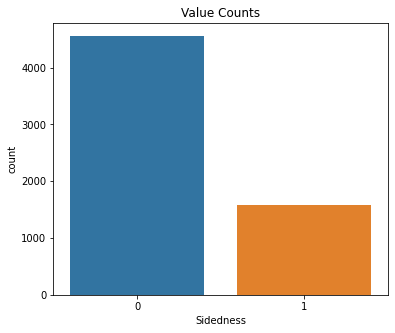

In [ ]:
plt.figure(figsize = (6,5))
sns.countplot(data=data,x='Sidedness')
plt.title("Value Counts")
plt.show()

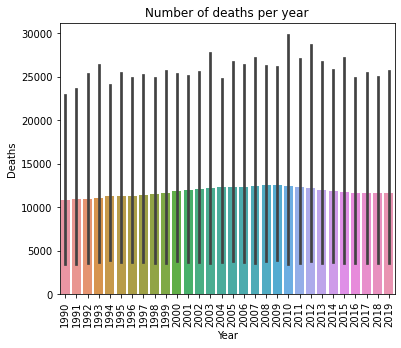

In [ ]:
plt.figure(figsize = (6,5))
sns.barplot(x='Year', y='Deaths', data= data)
plt.xticks(rotation=90)
plt.title("Number of deaths per year")
plt.show()

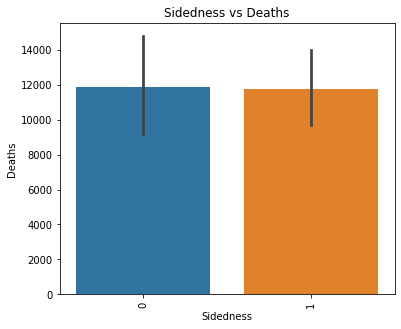

In [ ]:
plt.figure(figsize = (6,5))
sns.barplot(data = data,x='Sidedness',y='Deaths')
plt.xticks(rotation=90)
plt.title("Sidedness vs Deaths")
plt.show()

In [ ]:
accidents_by_country = data.groupby('Country').sum()
accidents_by_country.drop('Index', axis = 1, inplace = True)
print('Total Accidents = ' ,accidents_by_country['Deaths'].sum())
accidents_by_country.sort_values(by = 'Deaths', ascending = False).head()

Total Accidents =  72613564


,Year,Deaths,Sidedness
Country,,,
World,60135,36317087,0
China,60135,8350399,30
India,60135,5346154,30
United States,60135,1359744,0
Brazil,60135,1352192,0


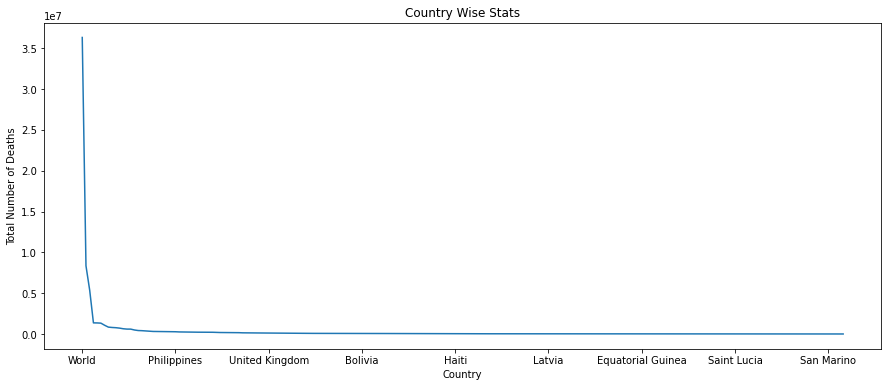

Country
World            36317087
China             8350399
India             5346154
United States     1359744
Brazil            1352192
                   ...   
San Marino             90
Tuvalu                 82
Monaco                 70
Niue                    0
Tokelau                 0
Name: Deaths, Length: 205, dtype: int64


In [ ]:
plt.subplots(figsize = (15, 6))
cr = accidents_by_country['Deaths'].sort_values(ascending = False)
ax = cr.plot.line()
ax.set_xlabel('Country')
ax.set_ylabel('Total Number of Deaths')
ax.set_title('Country Wise Stats')
plt.show()
print(cr)


In [ ]:
india_accidents = data[data['Country'] == 'India']

In [ ]:
india_accidents.head()


,Index,Country,Code,Year,Deaths,Sidedness
3420,3420,India,IND,1990,129821,1
3421,3421,India,IND,1991,135557,1
3422,3422,India,IND,1992,138623,1
3423,3423,India,IND,1993,141224,1
3424,3424,India,IND,1994,144071,1


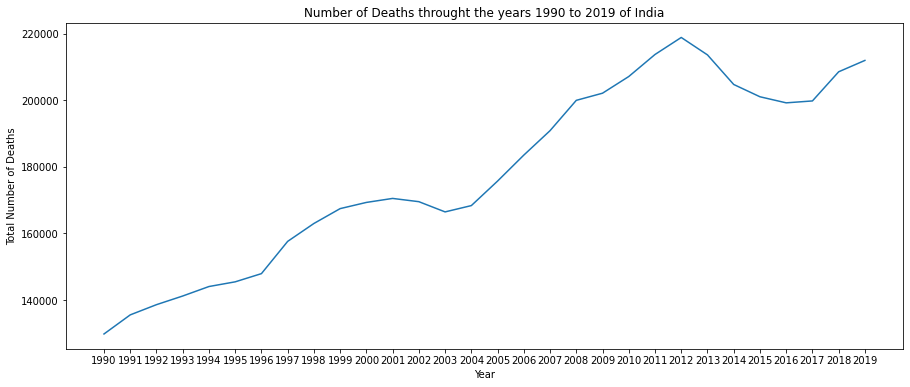

In [ ]:
# Let's have a look at yearly distribution of number of rape victims in Madhya Pradesh
india_accidents_by_year = india_accidents.groupby('Year').sum()
# plotting the data
plt.subplots(figsize = (15, 6))
ax = india_accidents_by_year['Deaths'].plot()
ax.xaxis.set_ticks(np.arange(1990, 2020, 1))
ax.set(xlabel = 'Year', ylabel = 'Total Number of Deaths',
title = 'Number of Deaths throught the years 1990 to 2019 of India')
plt.show()